In [1]:
import pandas as pd
import pymysql.cursors
import matplotlib.pyplot as plt 


In [2]:
## location_List 
location_list =["新竹縣","苗栗縣","彰化縣","南投縣","雲林縣","嘉義縣","屏東縣","宜蘭縣","花蓮縣","臺東縣","澎湖縣","金門縣","連江縣","基隆市","新竹市","嘉義市","臺北市","新北市","桃園市","臺中市","臺南市","高雄市"]

location_count_list = []
# Connect to the database
connection = pymysql.connect(host='localhost',
                             user='testadmin',
                             password='testadmin',
                             database='test',
                             cursorclass=pymysql.cursors.DictCursor)

with connection:
  

    with connection.cursor() as cursor:
        
        for location in location_list :
            sql = "SELECT count(*) FROM `all_event` WHERE `location` like %s"
            cursor.execute(sql, ("%" + location + "%",))
            result = cursor.fetchone()
            count = result['count(*)']
            new_list = []
            new_list.append(location)
            new_list.append(count)
            location_count_list.append(new_list)  
            

In [3]:
total = 0
for list_index in location_count_list:
    for i in list_index:
        if(type(i)==int):
            total = total + i
print(total)

8920


In [4]:
## 今年度 藝文活動場次 比率
df = pd.DataFrame(location_count_list, columns = ['location', 'count'])
df['ratio'] = df['count'] / total
display(df.sort_values(by=['ratio'], ascending=False))

,location,count,ratio
19,臺中市,2792,0.313004
20,臺南市,2740,0.307175
16,臺北市,1067,0.119619
21,高雄市,580,0.065022
18,桃園市,457,0.051233
17,新北市,325,0.036435
2,彰化縣,188,0.021076
1,苗栗縣,163,0.018274
3,南投縣,142,0.015919
6,屏東縣,139,0.015583


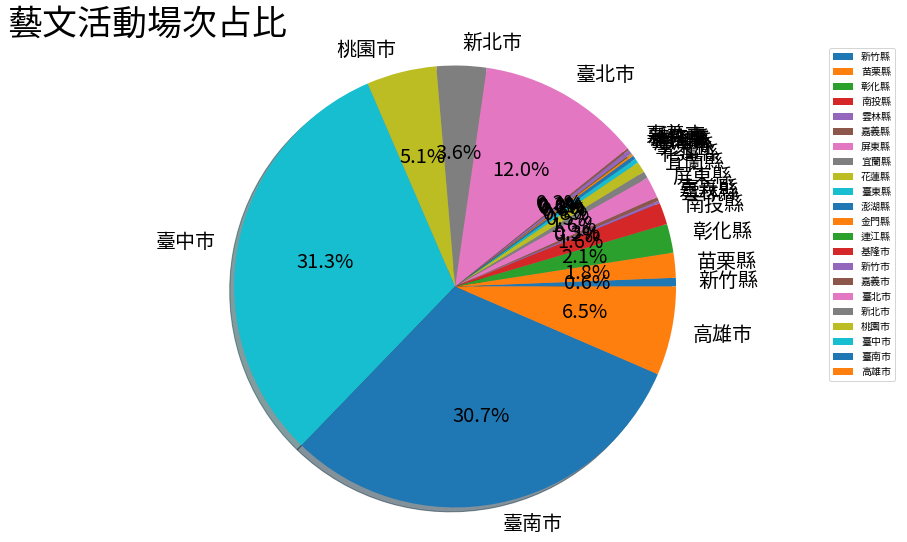

In [17]:
## 比率圖

plt.figure(figsize=(16,9))    # 顯示圖框架大小

labels = df["location"]      # 製作圓餅圖的類別標籤
size = df["ratio"]                         # 製作圓餅圖的數值來源
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

plt.pie(size,                           # 數值
        labels = labels,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 20},  # 文字大小
        shadow=True)                    # 設定陰影

 
plt.axis('equal')                                          # 使圓餅圖比例相等
plt.title("藝文活動場次占比", {"fontsize" : 35},loc ='left')  # 設定標題及其文字大小
plt.legend(loc = "best")                                   # 設定圖例及其位置為最佳

plt.savefig("本年度各縣市藝文活動比例.jpg",   # 儲存圖檔
            bbox_inches='tight',               # 去除座標軸占用的空間
            pad_inches=0.0)                    # 去除所有白邊
# plt.close()   